In [ ]:
## Cat and Dog Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import tensorflow.keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,LeakyReLU,ReLU,Flatten,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu,sigmoid,softmax


In [ ]:
# Using transer learning techniques

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16  # VGG16

In [ ]:
image_size = [224,224]

train_data = '/content/drive/MyDrive/Deep learning/CNN/Binary_cnn/Dummy Train'
test_data = '/content/drive/MyDrive/Deep learning/CNN/Binary_cnn/Dummy Test'

In [ ]:
vgg16 = VGG16(input_shape=image_size + [3] , weights='imagenet',include_top=False)  # VGG16

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layers in vgg16.layers:  # VGG16.layers:
  layers.trainable=False

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
x =Flatten()(vgg16.output)  # VGGG16


In [ ]:
predict = Dense(1,activation='sigmoid')(x) # sigmoid

# FOR MULTILABEL

# predict = Dense(3,activation='softmax')(x)


In [ ]:
model = Model(inputs = vgg16.inputs,outputs=predict) # VGG16

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          25,089 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_data = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)

In [ ]:
testing_data = ImageDataGenerator(rescale=1./255)

In [ ]:
train = training_data.flow_from_directory(train_data,
                                    target_size=(224,224),batch_size=2,class_mode='binary')

Found 300 images belonging to 2 classes.


In [ ]:
test = testing_data.flow_from_directory(test_data,
                                    target_size=(224,224),batch_size=2,class_mode='binary')

Found 150 images belonging to 2 classes.


In [ ]:
model.fit(train,epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 64s 353ms/step - accuracy: 0.6019 - loss: 0.8694
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.8578 - loss: 0.2978
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8959 - loss: 0.2992
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9374 - loss: 0.1978
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9486 - loss: 0.1047
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9787 - loss: 0.0512
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9844 - loss: 0.0498
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9946 - loss: 0.0432
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9995 - loss: 0.0299
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 1.0000 - loss: 0.0211
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9996 - loss: 0.0184
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/

In [ ]:
model.history.history.keys()

dict_keys(['accuracy', 'loss'])

In [ ]:
train_loss = model.history.history['loss']

In [ ]:
train_loss

[0.7089645266532898,
 0.23339317739009857,
 0.2629869878292084,
 0.1536598652601242,
 0.10637982189655304,
 0.04155665263533592,
 0.04547794163227081,
 0.06178266555070877,
 0.02950054407119751,
 0.022293077781796455,
 0.021787703037261963,
 0.04866356402635574,
 0.014833931811153889,
 0.025187866762280464,
 0.020711028948426247,
 0.009833316318690777,
 0.035286128520965576,
 0.020313886925578117,
 0.02041475661098957,
 0.01142722088843584,
 0.021391745656728745,
 0.05237896367907524,
 0.08304546028375626,
 0.011007389053702354,
 0.024645697325468063,
 0.002518808003515005,
 0.024042807519435883,
 0.010302270762622356,
 0.002346718218177557,
 0.009961987845599651,
 0.020649004727602005,
 0.0015312890755012631,
 0.002133104018867016,
 0.03927566483616829,
 0.01142567303031683,
 0.04572815075516701,
 0.03235656023025513,
 0.0004046632384415716,
 0.009174461476504803,
 0.0014135566307231784,
 0.0016926408279687166,
 0.000592766038607806,
 0.033185891807079315,
 0.0023021784145385027,
 0.0

In [ ]:
train_accuracy = model.history.history['accuracy']

train_accuracy


[0.6933333277702332,
 0.8966666460037231,
 0.8966666460037231,
 0.9333333373069763,
 0.95333331823349,
 0.9866666793823242,
 0.9866666793823242,
 0.9866666793823242,
 0.9933333396911621,
 1.0,
 0.996666669845581,
 0.9866666793823242,
 1.0,
 0.9933333396911621,
 0.9900000095367432,
 1.0,
 0.9866666793823242,
 0.9933333396911621,
 0.996666669845581,
 0.9933333396911621,
 0.9866666793823242,
 0.9766666889190674,
 0.9766666889190674,
 0.996666669845581,
 0.9933333396911621,
 1.0,
 0.9866666793823242,
 0.996666669845581,
 1.0,
 1.0,
 0.9933333396911621,
 1.0,
 1.0,
 0.9833333492279053,
 0.9900000095367432,
 0.9866666793823242,
 0.9866666793823242,
 1.0,
 0.996666669845581,
 1.0,
 1.0,
 1.0,
 0.9900000095367432,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
test_loss = model.history.history['loss']
test_loss

[0.7089645266532898,
 0.23339317739009857,
 0.2629869878292084,
 0.1536598652601242,
 0.10637982189655304,
 0.04155665263533592,
 0.04547794163227081,
 0.06178266555070877,
 0.02950054407119751,
 0.022293077781796455,
 0.021787703037261963,
 0.04866356402635574,
 0.014833931811153889,
 0.025187866762280464,
 0.020711028948426247,
 0.009833316318690777,
 0.035286128520965576,
 0.020313886925578117,
 0.02041475661098957,
 0.01142722088843584,
 0.021391745656728745,
 0.05237896367907524,
 0.08304546028375626,
 0.011007389053702354,
 0.024645697325468063,
 0.002518808003515005,
 0.024042807519435883,
 0.010302270762622356,
 0.002346718218177557,
 0.009961987845599651,
 0.020649004727602005,
 0.0015312890755012631,
 0.002133104018867016,
 0.03927566483616829,
 0.01142567303031683,
 0.04572815075516701,
 0.03235656023025513,
 0.0004046632384415716,
 0.009174461476504803,
 0.0014135566307231784,
 0.0016926408279687166,
 0.000592766038607806,
 0.033185891807079315,
 0.0023021784145385027,
 0.0

In [ ]:
test_accuracy = model.history.history['accuracy']

In [ ]:
test_accuracy

[0.6933333277702332,
 0.8966666460037231,
 0.8966666460037231,
 0.9333333373069763,
 0.95333331823349,
 0.9866666793823242,
 0.9866666793823242,
 0.9866666793823242,
 0.9933333396911621,
 1.0,
 0.996666669845581,
 0.9866666793823242,
 1.0,
 0.9933333396911621,
 0.9900000095367432,
 1.0,
 0.9866666793823242,
 0.9933333396911621,
 0.996666669845581,
 0.9933333396911621,
 0.9866666793823242,
 0.9766666889190674,
 0.9766666889190674,
 0.996666669845581,
 0.9933333396911621,
 1.0,
 0.9866666793823242,
 0.996666669845581,
 1.0,
 1.0,
 0.9933333396911621,
 1.0,
 1.0,
 0.9833333492279053,
 0.9900000095367432,
 0.9866666793823242,
 0.9866666793823242,
 1.0,
 0.996666669845581,
 1.0,
 1.0,
 1.0,
 0.9900000095367432,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
epochs = np.arange(1,51)

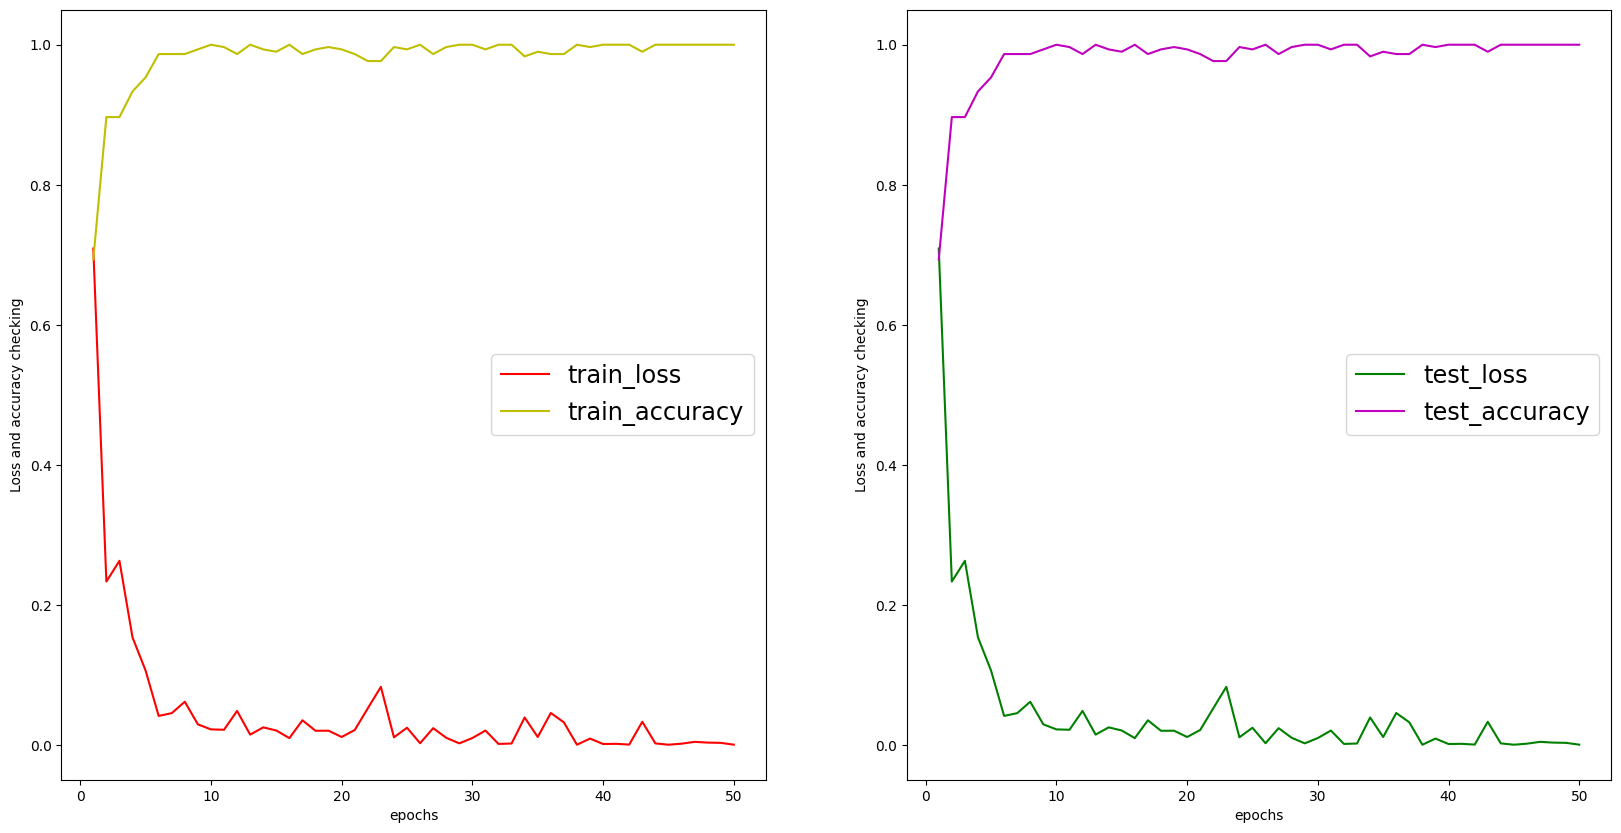

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs,train_loss,color='r',label='train_loss')
plt.plot(epochs,train_accuracy,color='y',label='train_accuracy')
plt.legend(loc='best',fontsize='xx-large')
plt.xlabel("epochs")
plt.ylabel('Loss and accuracy checking')
plt.subplot(1,2,2)
plt.plot(epochs,test_loss,color='g',label='test_loss')
plt.plot(epochs,test_accuracy,color='m',label='test_accuracy')
plt.xlabel("epochs")
plt.ylabel('Loss and accuracy checking')
plt.legend(loc='best',fontsize='xx-large')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
classes = {0:"Cat",1:'Dog'}
for i in classes.items():
    print(i)

(0, 'Cat')
(1, 'Dog')


In [ ]:
## Predicting (testing)

**New data point**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.]]
[0]
Cat


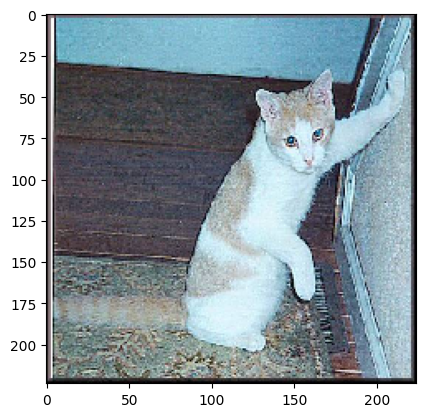

In [ ]:
image_path = '/content/drive/MyDrive/Deep learning/CNN/Binary_cnn/Dummy Test/Cat/Copy of cat.4001.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1.]]
[0]
Cat


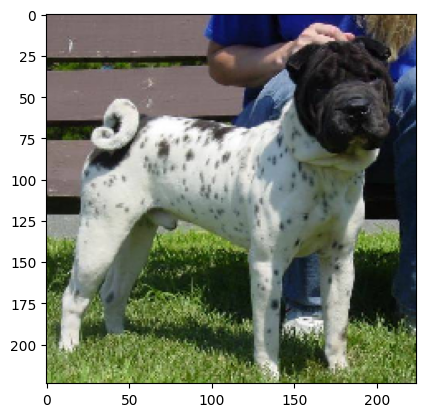

In [ ]:
image_path = '/content/drive/MyDrive/Deep learning/CNN/Binary_cnn/Dummy Test/Dog/Copy of dog.4061.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

**save the Model**

In [ ]:
import pickle

In [ ]:
f= open('Binary_cnn_Vgg16.pkl','wb')
pickle.dump(model,f)
f.close()